## About Dataset

Travelling from One city of the country to the other country within few hours is possible through Flights, But  the fare of flights is quite unpredictable.
sometimes the airlines charges high and sometimes less, besides some airlines provide some additional services sometiems not,
some airlines have no stops in between some includes stops all this things contribute to the fare of the Airline Tickets,
It becomes difficult for the customer to know whether he/she is not being charged high by some airline .

so to overcome this we are provided with some data of Flights to predict the appropriate ticket fare .

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

##### Loading Dataset

In [2]:
df=pd.read_excel('Flight_Ticket_Participation_Data_Train.xlsx')

##### Basic Insights of Datasets

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


##### checking the Dimension of the datset

In [4]:
df.shape

(10683, 11)

##### checking the column names

In [5]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

##### Checking the datatypes of the Dataset

In [6]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

###  Identifying and Handling missing values
A missing value condition occurs whenever a data entry is left empty

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are only two null values in the dataset

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

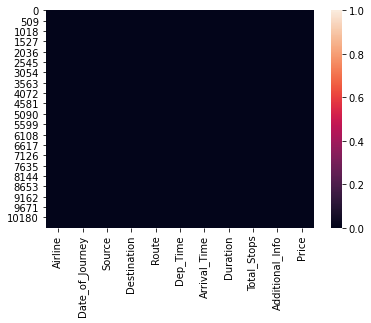

In [9]:
sns.heatmap(df.isnull())

As there are two null values in the dataset

##### Replacing the Null values with most frequent data of the column

### Simple Imputer

In [10]:
from sklearn.impute import SimpleImputer

list1=['Route','Total_Stops']

SI= SimpleImputer(strategy='most_frequent')
for i in list1:
    df[i]=SI.fit_transform(df[i].values.reshape(-1,1))

In [11]:
# rechecking Null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

##### basic insights of the dataset

In [12]:
pd.set_option('display.max_rows',None)
df['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [13]:
pd.set_option('display.max_rows',None)
df['Route'].value_counts()

DEL → BOM → COK                      2377
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
CCU → DEL → BLR                       565
BLR → BOM → DEL                       402
MAA → CCU                             381
DEL → HYD → COK                       326
DEL → JAI → BOM → COK                 240
DEL → BLR → COK                       232
DEL → COK                             213
DEL → AMD → BOM → COK                 205
DEL → MAA → COK                       146
DEL → IDR → BOM → COK                  99
DEL → HYD → MAA → COK                  83
DEL → NAG → BOM → COK                  71
CCU → MAA → BLR                        65
DEL → GOI → BOM → COK                  58
DEL → HYD → BOM → COK                  56
CCU → HYD → BLR                        53
DEL → BHO → BOM → COK                  50
CCU → BBI → BLR                        50
CCU → IXR → DEL → BLR             

In [14]:
pd.set_option('display.max_rows',None)
df['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
20:00    185
09:00    184
09:35    183
21:10    180
07:00    167
13:00    164
14:05    163
11:40    161
10:20    159
11:30    158
08:00    152
06:30    140
09:45    140
05:30    138
08:25    136
06:00    131
20:25    125
05:45    122
17:45    118
22:50    114
08:20    114
16:55    109
16:30    109
16:00    100
12:00     98
19:45     97
07:30     95
19:35     94
15:15     91
09:40     90
17:30     90
17:15     89
09:25     85
19:30     83
02:15     80
20:20     79
20:55     78
05:50     78
05:55     78
13:15     76
08:45     75
21:25     74
04:55     73
07:35     72
15:00     72
14:00     71
11:10     71
06:40     71
22:20     70
06:50     70
08:30     69
09:30     68
23:05     66
18:15     66
06:55     66
21:50     66
10:35     63
17:10     63
16:45     62
21:05     61
19:00     59
07:55     59
14:35     58
09:10     57
05:15     56
14:25     56
23:30     55
06:05     53
13:20     53
19:10     53
08:55     52
22:00     51

In [15]:
pd.set_option('display.max_rows',None)
df['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
20:45           112
22:30           111
18:50           111
22:50           104
11:20            95
19:50            94
21:20            90
12:20            87
22:25            77
21:05            72
23:35            71
20:05            69
14:05            68
08:35            67
12:00            63
19:45            60
23:00            57
07:15            56
12:55            55
13:15            54
11:25            54
18:10            54
15:30            53
08:45            53
19:40            53
10:40            53
22:00            52
10:10            51
22:35            51
19:35            50
22:55            50
09:30            49
16:20            49
21:50            49
10:05            49
11:50            49
12:10            49
18:15            49
13:55            49
07:45            49
08:50            48
04:25 07 Jun     48
10:35            48
23:15            46
22:20            45


#### Visualization of the Dataset

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

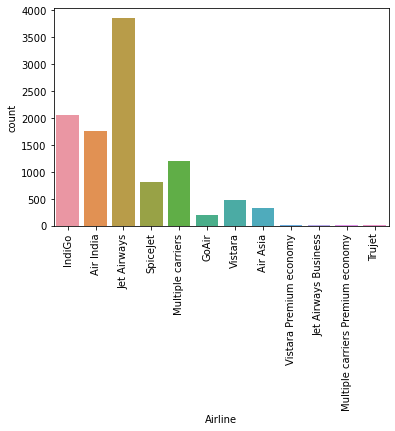

In [16]:
p=sns.countplot(df['Airline'])
p.set_xticklabels(p.get_xticklabels(),rotation=90)
df['Airline'].value_counts()

As per the above graph it can be observed that there are 3849 are Jet Airways flight , there are 2053 flights of the Indigo

there are 1752 flights of the AirIndia , 
there are 1196 flights of the Multiple Carriers,


there are 818 flights of the SpiceJet, 
there are 479 flights of the Vistara , 


there are 319 flights of the Air Aisa
there are 13  flights of theMultiple carriers Premium economy      ,

there are 6 flights of the  Jet Airways Business   ,
there are  3 flights of the Vistara Premium economy         ,

and there is  1 flights of the Trujet.




Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

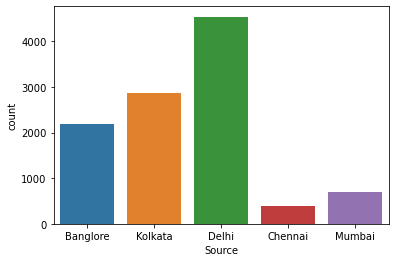

In [17]:
sns.countplot(df['Source'])
df['Source'].value_counts()

There are 4537 flights for the Delhi,

There are 2871 flights for the Kolkata,

There are 2197 flights for the Banglore,

There are 697 flights for the Mumbai,

and There are 381 flights for the Chennai

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

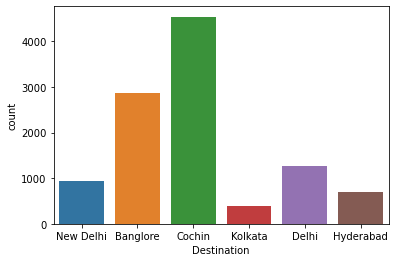

In [18]:
sns.countplot(df['Destination'])
df['Destination'].value_counts()

4537 Flights are having their destination as Cochin, 
 
2871 Flights are having their destination as Banglore,
  
1265 Flights are having their destination as Delhi,

932 Flights are having their destination as Ne Delhi,
 
697 Flights are having their destination as Hyderabad,
 
381 Flights are having their destination as kolkata

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

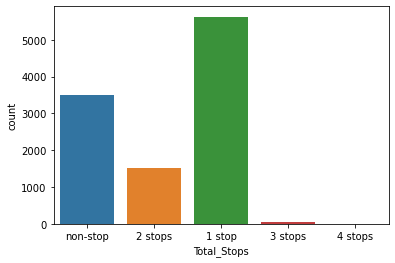

In [19]:
sns.countplot(df['Total_Stops'])
df['Total_Stops'].value_counts()

5262 flight have 1 stop ,   3491 flights are non-stop ,

1520 flights have 2 stops  , 45 flights have 3 stops and 

1 flight have 4 stops in them

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

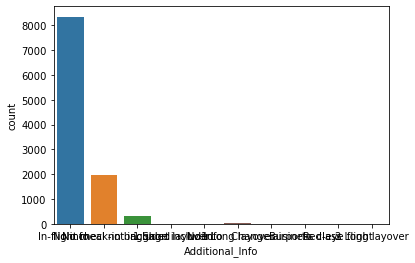

In [20]:
sns.countplot(df['Additional_Info'])
df['Additional_Info'].value_counts()

there is no info about 8345 flights,
 
In 1982 flight meal is not inclded,

in 320 flights No check in baggage included,

in 19 flight 1 long layover is there,

in 7 flights airport is changed, 4 flights are business class,

in 3 flight there is no info,

in 1 flight there is red-eye-flight.

1 flight is having 2 long layover,
 
in 1 flight there is `1 short layover

<AxesSubplot:ylabel='Frequency'>

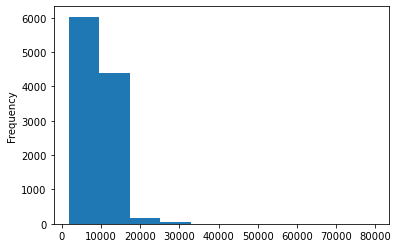

In [21]:
df['Price'].plot.hist()


more than 6000 tickets have ticket price between 0 to 10000, and more than 4000 flights have tickets between 10000 to 20000
and less than 100 flights have tickets between 20000 to 30000

In [22]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2377,233,423,550,5626,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


Note  - all the columns that are of object datatype are showing as NaN in mean ,std,min, 25%, 50 %, 75% , and max 
only price column is showing the values

Observation  :-
    
1) there are 12 unique values in Airline, on the top is jet airways and there are 3849 flights  of jetways 

2) there are 44 unique values of date_of_journey, on the top  18-5-2019  504 flights lew on this day

3) there are 5 unique values in Delhi , on the top is  Delhi  and there are 4537 flights  for delhi

4) there are 6 unique values in destination , on the top is cochin  and there are 4537 flights for cochin 

5) there are 128 unique values of route , on the top is DEL-BOM-COK  and there are 2377 number of flights for this route

6) there are 222 unique arrival time and 1343 unique arrival time , 368 unique durations, 

7) there are 5 unique total stops and there are 10 unique additional information

8) In price the 75% and max is having a significant difference it means there is presence of Outliers

9) The value of standard deviation is quite high it means that data is higly spread


### feature engineering

as date and time in the datset are all different and it will make it harder for the model to learn
to make it learn easier for the model it will be best to separate day, date, year,hour and min separated 

In [23]:
df['Journey_year']=pd.DatetimeIndex(df['Date_of_Journey']).year

In [24]:
df['Journey_month']=pd.DatetimeIndex(df['Date_of_Journey']).month

In [25]:
df['Journey_day']=pd.DatetimeIndex(df['Date_of_Journey']).day

In [26]:
df['Departure_hour']=pd.DatetimeIndex(df['Dep_Time']).hour

In [27]:
df['Departure_minutes']=pd.DatetimeIndex(df['Dep_Time']).minute

In [28]:
df['Arrival_hour']=pd.DatetimeIndex(df['Arrival_Time']).hour

In [29]:
df['Arrival_minutes']=pd.DatetimeIndex(df['Arrival_Time']).minute

In [30]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3,16,50,21,35


### Dropping the columns

As we have separated the Date_Of_Journey in Journey_day, Journey_month, Journey_year and Dep_Time in Departure_hour, Departure_minutes
and same of Arrival_Time into Arrival_hour , Arrival_minutes so we do not need the old columns anymore as data is extracted in a very well
manner 

In [31]:
df.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [32]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,1,3,16,50,21,35


### Label Encoding

In [33]:
# As all the columns are of Object type its better to convert them labelly for better learning of the Model
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes == object:
        df[i]=le.fit_transform(df[i].astype(str))

In [34]:
# rechecking the datatypes of columns
df.dtypes

Airline              int32
Source               int32
Destination          int32
Route                int32
Duration             int32
Total_Stops          int32
Additional_Info      int32
Price                int64
Journey_year         int64
Journey_month        int64
Journey_day          int64
Departure_hour       int64
Departure_minutes    int64
Arrival_hour         int64
Arrival_minutes      int64
dtype: object

### Checking Correlation

Correlation is a statistical metric for measuring to what extent  different variables are Interdependent .

In another word, if one variable changes how it affects the change in another variable

In [35]:
dfcor=df.corr()

<AxesSubplot:>

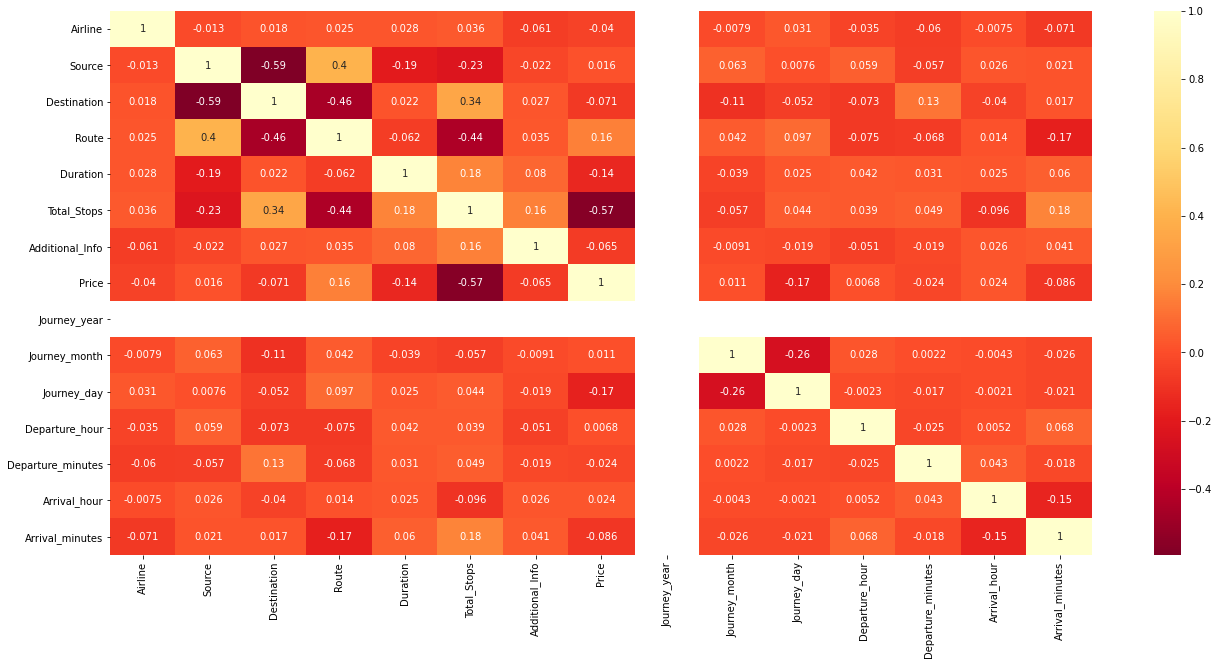

In [36]:
plt.figure(figsize=(22,10))
sns.heatmap(dfcor, cmap="YlOrRd_r", annot=True)

the journey year is constant and that is 2019 so it is showing complete white

price is having high positive linear relation with route , 

total_stops is highly negatively correlated with price

soure and destination are negatively correlated

### Checking Outliers
Outliers are the values that fall really outside the range of the data, and it is checked through two methods zscore and IQR

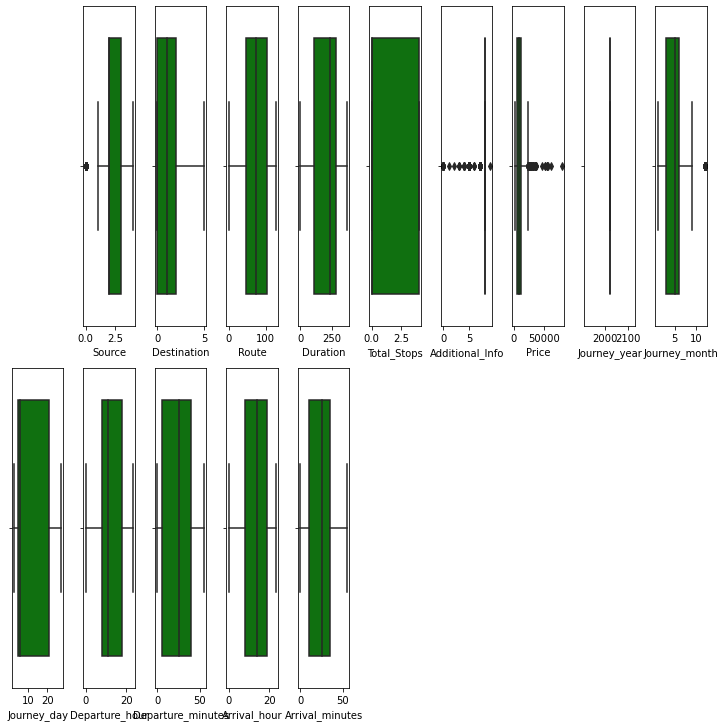

In [37]:
collist=df.columns.values
ncol=10
nrows=10


plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

From the above boxplots it can be observed that price and Additional_info have outliers

In [38]:
# statistically checking the Outliers
from scipy.stats import zscore
z=np.abs(zscore(df))

In [39]:
threshold=3
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
        4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
        6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
        7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
        8957,  8990,  9019,  9019,  9193,  9239,  9632,  9657,  9715,
        9974, 10052, 10113, 10160, 10182, 10189, 10353, 10364, 10364,
       10383, 10439, 10511, 10511], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7,

the z-score is showing all the columns of additional_info and price as outliers 

In [40]:
# creatinge new dataset where zscore is less than 3
df_new=df[(z<3).all(axis=1)]

In [41]:
# comparing the dataset with and without Outliers
df_new.shape , df.shape

((0, 15), (10683, 15))

### Checking Skewness

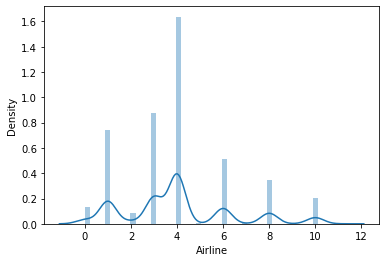

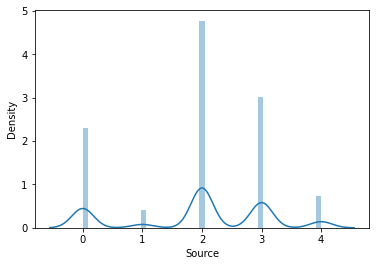

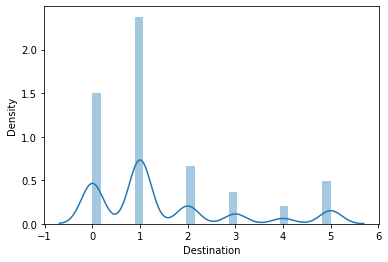

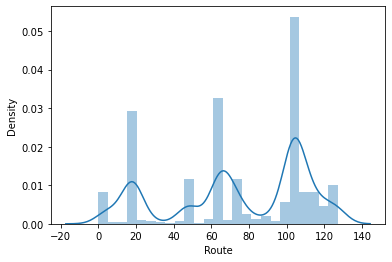

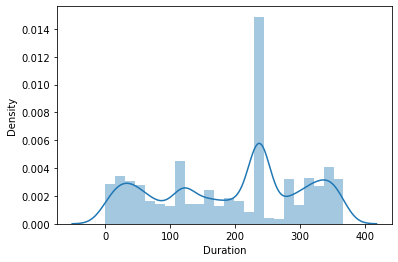

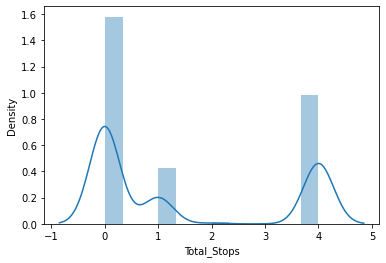

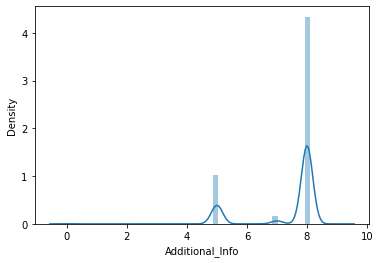

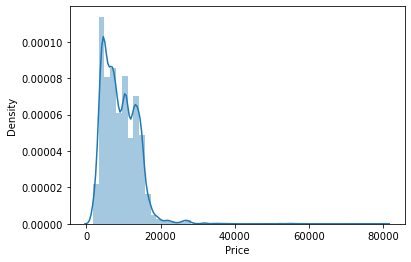

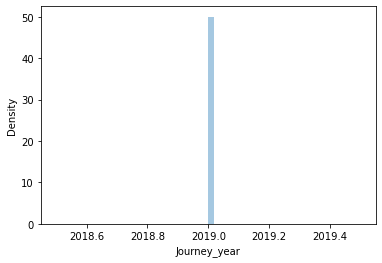

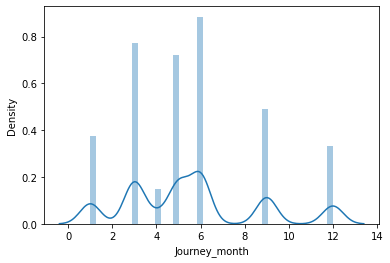

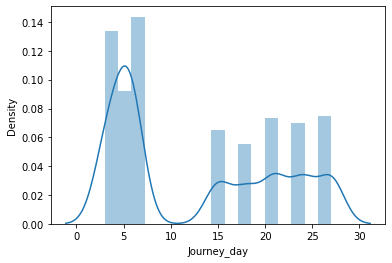

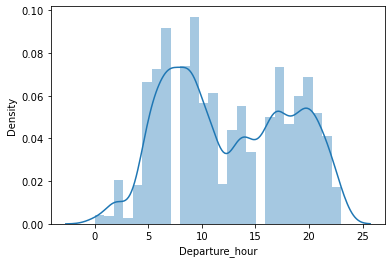

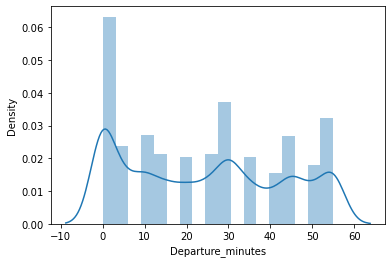

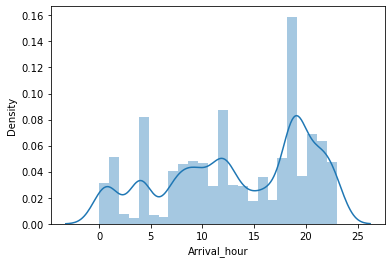

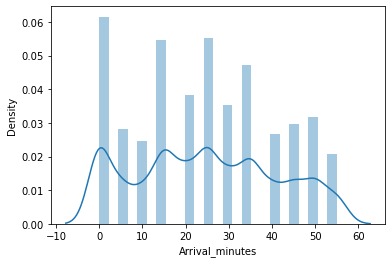

In [42]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

max columns in it are converted from categorical to Numerical so as per their frequency it is showing skewness,



### Splitting the Data in X (features) and Y (Target )¶

In [43]:
x=df.drop('Price',axis=1)
x.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_year,Journey_month,Journey_day,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minutes
0,3,0,5,18,240,4,8,2019,3,24,22,20,1,10
1,1,3,0,84,336,1,8,2019,1,5,5,50,13,15
2,4,2,1,118,106,1,8,2019,9,6,9,25,4,25
3,3,3,0,91,311,0,8,2019,12,5,18,5,23,30
4,3,0,5,29,303,0,8,2019,1,3,16,50,21,35


### finding the best random state and training model for LinearRegression

In [44]:
y=df['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
5         3873
6        11087
7        22270
8        11087
9         8625
10        8907
11        4174
12        4667
13        9663
14        4804
15       14011
16        5830
17       10262
18       13381
19       12898
20       19495
21        6955
22        3943
23        4823
24        7757
25       13292
26        8238
27        7682
28        4668
29        3687
30        3687
31       13227
32        4423
33       10919
34       12373
35        5894
36        4649
37        6245
38       19225
39       14924
40        9646
41        8714
42       12373
43        3383
44       13062
45        3527
46        3943
47        4667
48        6117
49       11150
50        7202
51       12121
52        4377
53        3943
54        4483
55       14231
56       17345
57        7414
58        8073
59       12395
60        8366
61        5117
62       12524
63        7191
64        3687
65        5894
66        

In [45]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [46]:
bestrandomstate=0
maxr2score=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    r2score=r2_score(y_test,predlr)
    if r2score > maxr2score:
        maxr2score = r2score
        bestrandomstate=i
print(f"best r2_score is {maxr2score} at random_state of {bestrandomstate}")
    

best r2_score is 0.4255337301366551 at random_state of 192


###### we are getting best random state as 192 giving thebhighest accuracy of 42 %

In [82]:
#using best random state for the model LinearRegression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=192)
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(r2_score(y_test,predlr))

0.4255337301366551


Linear Regression is giving the r2_score of 40%

### Cross Validation of the Model

In [48]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvs=cross_val_score(lr,x,y,cv=j)
    cvsmean=cvs.mean()
    print(f"At cross fold {j} the cv_score is {cvsmean} ")

At cross fold 2 the cv_score is 0.3709023643990846 
At cross fold 3 the cv_score is 0.37121597045374616 
At cross fold 4 the cv_score is 0.3710855399660665 
At cross fold 5 the cv_score is 0.3710207139617612 
At cross fold 6 the cv_score is 0.37147145024666234 
At cross fold 7 the cv_score is 0.3715693945726189 
At cross fold 8 the cv_score is 0.3714495599004412 
At cross fold 9 the cv_score is 0.3721170315900144 


###### the Cross_Val_Score of Linear Regression is giving the accuracy of  37.15% at cv=6

##### here we have solved the problem of Overfitting and UnderFitting by checking through cross_val_score

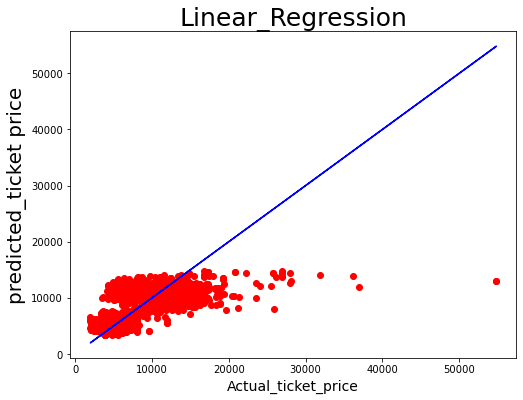

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predlr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual_ticket_price",fontsize=14)
plt.ylabel("predicted_ticket price",fontsize=20)
plt.title("Linear_Regression",fontsize=25)
plt.show()

### Regularization

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters,cv=4)
clf.fit(x_train,y_train)


print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [51]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

pred_ls = ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.4042273381876914

###### Lasso is giving the r2_score of  40%

In [52]:
cv_score=cross_val_score(ls,x,y,cv=4)
cv_mean=cv_score.mean()
cv_mean

0.3710756907222956

###### Cross val score of Lasso is 37% at cv=4

### Ensemble Technique

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt",'log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [54]:
rf=RandomForestRegressor(criterion='mae' ,max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs= r2_score(y_test,pred_rf)
print("R2_score",rfs*100)


R2_score 87.7031862908593


###### The r2_score of RandomforestRegressor is 87 %

In [55]:
cv_score=cross_val_score(rf,x,y,cv=4)
cv_mean=cv_score.mean()
print(f" the cross_val_score is {cv_mean}")

 the cross_val_score is 0.8838176827131445


###### The cross_val_score of RandomForestRegressor is 88 %

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

parameters={
             'loss':['linear', 'square', 'exponential'],
                'n_estimators':[50,100,150,200,250],
            }
abr=AdaBoostRegressor()
cl=GridSearchCV(abr,parameters)
cl.fit(x_train,y_train)

print(cl.best_params_)

{'loss': 'square', 'n_estimators': 50}


In [81]:
abr=AdaBoostRegressor(loss ='square' ,n_estimators=50)
abr.fit(x_train,y_train)
abr.score(x_train,y_train)
pred_abr=abr.predict(x_test)

abrs= r2_score(y_test,pred_abr)
print("R2_score",abrs*100)


R2_score 13.47816141555256


###### the R2score of AdaBoostRegressor is 13%

## conclusion


    
1)  Linear Regression  is having r2_score  42   and cross_val_score  of   37  so the Difference is    5

2)  Lasso  is having r2_score 40  and cross_val_score  of   37  so the Difference is    3
 
3)  RandomForestRegressor is having r2_score 87  and cross_val_score  of 88  so the Difference is  1

4) AdaBoostRegressor is having r2_score of 13 %

###### from above we can conclude that RandomfortestRegresor is giving best accuracy  but the difference between the R2_score of  LinearRegression is more than half so it can be coclude that RandomForestRegressor has overfitted the model . so we will make our model on LinearRegression is best as it is giving the highest r2score.



In [84]:
# hyper parameter Tuning of LinearRegression model

parameters={
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]}
lr=LinearRegression()
lrgsv=GridSearchCV(lr,parameters)
lrgsv.fit(x_train,y_train)

print(lrgsv.best_params_)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}


In [85]:
lr=LinearRegression( copy_X = True, fit_intercept = False, normalize = True)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_lr=lr.predict(x_test)

lrs= r2_score(y_test,pred_lr)
print("R2_score",lrs*100)


R2_score 42.553373013665386


### Saving the Model

In [119]:

import pickle
filename='flight_ticket_prediction_LR.pkl'
pickle.dump(lr,open(filename,'wb'))

In [120]:
#cross-checking that how well our model has learnt

In [121]:
loaded_model=pickle.load(open('flight_ticket_prediction_LR.pkl','rb'))
result=loaded_model.score(x_test,y_test)

print(result)

0.42553373013665385


In [122]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_ls[:]],index=["Predicted","Original"])

In [123]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350
Predicted,11020.853720,9963.611914,6338.883685,10663.187733,10145.918478,11826.494498,9437.976720,5834.656716,4693.962451,10767.514690,...,4388.718557,6121.695037,11672.328764,10290.488220,10110.438410,12289.268408,11231.722922,11049.963998,9324.941599,6268.179359
Original,9521.430216,10464.364480,8534.784583,6202.851471,10389.490055,5935.670563,11919.722682,4501.569821,11476.660882,4145.757193,...,10941.950745,4542.641435,11508.883087,11435.813136,10151.542919,5654.921295,10042.411280,4489.310209,9603.326214,4977.789675


# loading the test model

In [124]:
df_test=pd.read_excel('Flight_Ticket_Participant_Test_set.xlsx')

In [125]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [126]:
df_test.shape

(2671, 10)

In [127]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [128]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### feature engineering

In [129]:
df_test['Journey_year']=pd.DatetimeIndex(df_test['Date_of_Journey']).year

In [130]:
df_test['Journey_month']=pd.DatetimeIndex(df_test['Date_of_Journey']).month

In [131]:
df_test['Journey_day']=pd.DatetimeIndex(df_test['Date_of_Journey']).day

In [132]:
df_test['Departure_hour']=pd.DatetimeIndex(df_test['Dep_Time']).hour

In [133]:
df_test['Departure_minutes']=pd.DatetimeIndex(df_test['Dep_Time']).minute

In [134]:
df_test['Arrival_hour']=pd.DatetimeIndex(df_test['Arrival_Time']).hour

In [135]:
df_test['Arrival_minutes']=pd.DatetimeIndex(df_test['Arrival_Time']).minute

In [136]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_year,Journey_month,Journey_day,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24,23,55,2,45


### Dropping the columns

As we have separated the Date_Of_Journey in Journey_day, Journey_month, Journey_year and Dep_Time in Departure_hour, Departure_minutes
and same of Arrival_Time into Arrival_hour , Arrival_minutes so we do not need the old columns anymore as data is extracted in a very well
manner 

In [137]:
df_test.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [138]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_year,Journey_month,Journey_day,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,2019,6,24,23,55,2,45


In [139]:
# As all the columns are of Object type its better to convert them labelly for better learning of the Model
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_test.columns:
    if df_test[i].dtypes == object:
        df_test[i]=le.fit_transform(df_test[i].astype(str))

In [140]:
# rechecking the datatypes of columns
df_test.dtypes

Airline              int32
Source               int32
Destination          int32
Route                int32
Duration             int32
Total_Stops          int32
Additional_Info      int32
Journey_year         int64
Journey_month        int64
Journey_day          int64
Departure_hour       int64
Departure_minutes    int64
Arrival_hour         int64
Arrival_minutes      int64
dtype: object

### LOADING THE MODEL

In [141]:
fitted_model=pickle.load(open("flight_ticket_prediction_LR.pkl",'rb'))

In [142]:
fitted_model

LinearRegression(fit_intercept=False, normalize=True)

In [143]:
#predicions over test data
predictions=fitted_model.predict(df_test)

In [144]:
predictions

array([12107.28502627, 10203.14476893, 10251.63783647, ...,
       11790.56442071, 11596.95730249, 10516.57400094])

In [145]:

df_predictions = pd.DataFrame(predictions, columns=['flight_predicted_tickets}'])
df_predictions

,flight_predicted_tickets}
0,12107.285026
1,10203.144769
2,10251.637836
3,10400.027649
4,5348.765249
5,11064.409093
6,12792.158384
7,11252.592242
8,4211.485296
9,9922.624824


### Exporting the prediction file to CSV

In [147]:
df_predictions.to_csv("Flights_price_prediction.csv", index=False)

In [ ]:
#df_predictions.to_excel("Doctor_Consulation_Predicted_Fees7.xlsx",encoding='UTF-8', index=False)